In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\varun\\Downloads\\iris.csv")
df

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# EDA

Text(0.5, 1.0, 'Scatter Plot of Petal Length vs. Petal Width')

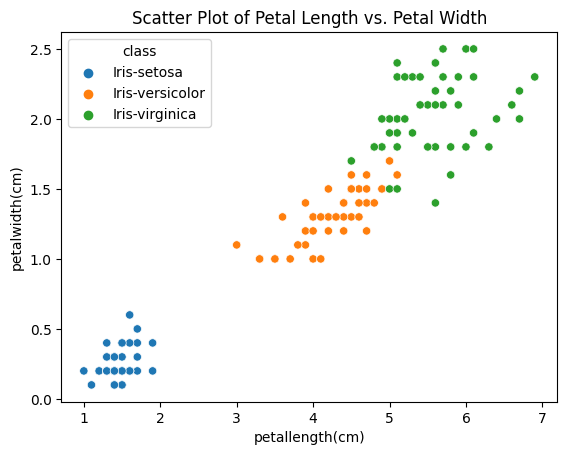

In [6]:
sns.scatterplot(x='petallength(cm)', y='petalwidth(cm)', hue='class', data=df)
plt.title('Scatter Plot of Petal Length vs. Petal Width')

In [7]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Removing the label for Clustering

In [8]:
df=df.drop(columns='class')

In [9]:
df

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Finding K value

Elbow method

In [10]:
from sklearn import cluster
#create an empty for holding error values
error=[]
for i in range(1,11):#(1-10)classes
    kmeans=cluster.KMeans(n_clusters =i,init='k-means++',random_state=0)#k-means++ for faster convergence
    kmeans.fit(df)#assigning the data points to clusters
    error.append(kmeans.inertia_)

c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

In [11]:
error

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.420191786283894,
 30.064593073593073,
 28.332569264069267,
 25.972596377306907]

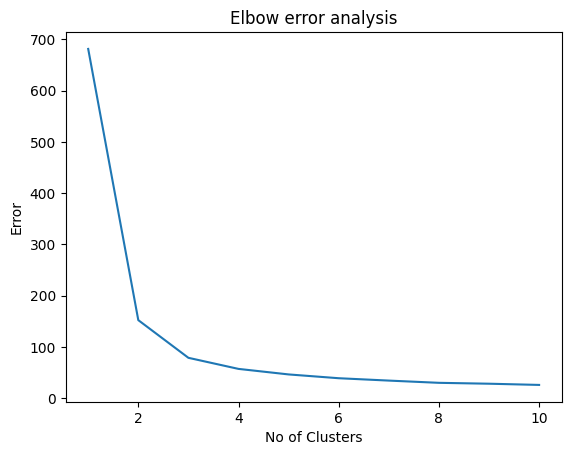

In [12]:
plt.plot(range(1,11),error)
plt.xlabel('No of Clusters')
plt.ylabel('Error')
plt.title('Elbow error analysis')
plt.show()

From the graph it is clear that the error doesn't goes low after 3

# Model definition

In [13]:
knn_model=cluster.KMeans(n_clusters =3,init='k-means++',random_state=0)

In [14]:
knn_model.fit(df)

c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [15]:
pred_class=knn_model.predict(df)

c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


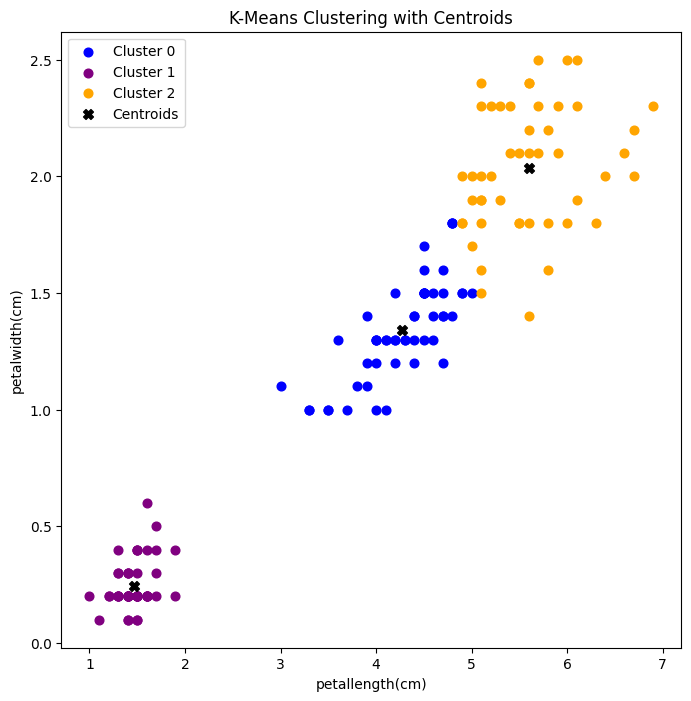

In [28]:
df['Cluster'] = knn_model.fit_predict(df[['petallength(cm)', 'petalwidth(cm)']])

n_clusters = 3
centroids = knn_model.cluster_centers_

colors = ['blue', 'purple', 'orange']

plt.figure(figsize=(8, 8))
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['petallength(cm)'], cluster_data['petalwidth(cm)'],
                label=f'Cluster {i}', c=colors[i], s=39)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=50, c='black', label='Centroids')
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()


# Evaluation

In [29]:
from sklearn.metrics import silhouette_score

silhouette_sc= silhouette_score(df, df['Cluster'])
print("Silhouette Score  of 6 clusters:", silhouette_sc)

Silhouette Score  of 6 clusters: 0.6737391729049025


# Predictive analysis

In [23]:
knn_model.predict([[1.1,2.2,4.3,4.4]])

c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
knn_model.predict([[1.1,2.2,4.3,4.4]])